In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [2]:
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}



In [27]:
block_size = 3 #context

X,Y = [],[]

for w in words:
    context = [0]*block_size

    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)


In [79]:

def buildDataset(words):
    block_size = 3 #context

    X,Y = [],[]

    for w in words:
        context = [0]*block_size

        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y


In [80]:
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr,Ytr = buildDataset(words[:n1])
Xdev,Ydev = buildDataset(words[n1:n2])
Xtest,Ytest = buildDataset(words[n2:])



In [77]:
Xtest.shape

torch.Size([22866, 3])

In [9]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
#why embeddings? because if we have a huge vocabukary, we the count table/weiht matrix will get very large,
#so we reduce the dimensions and this is what word embeddings are and also we do one-hot encoding, each input
#will also get very huge, hence the word embeddings

In [6]:
C = torch.randn((27,2))
C

tensor([[-0.1624, -0.3268],
        [-1.1902, -0.7771],
        [-1.1407, -0.3889],
        [ 1.4655,  0.2752],
        [ 0.9227, -0.1005],
        [-1.2708, -2.1439],
        [ 1.4130,  0.6896],
        [-0.1015, -0.9872],
        [-0.8022,  0.2185],
        [-0.2064, -0.6460],
        [ 0.4205, -1.5608],
        [-0.0952,  0.7246],
        [ 1.8269,  0.2085],
        [-0.1410,  0.8016],
        [-0.2412, -2.1454],
        [ 0.9632,  1.4284],
        [-0.0819, -1.3815],
        [ 0.9544,  0.2491],
        [ 0.2271,  0.1308],
        [ 0.6405, -1.3724],
        [ 0.4848,  0.1172],
        [ 0.8056,  1.0183],
        [ 0.3281, -0.3507],
        [-0.8739, -0.6710],
        [-0.6908, -0.3790],
        [ 0.1867, -1.0744],
        [-0.6472, -0.5502]])

In [11]:
C[5]

tensor([-0.1330,  0.0790])

In [7]:
emb = C[X]

In [8]:
W1 = torch.randn((6,100)) #input to the hidden layer will be 6 as we have to take cotext of three, and each of the characters in the cntetx is respresented by 2 dimensions
b1 = torch.randn(100)

In [22]:
emb

tensor([[[ 2.1296, -0.1937],
         [ 2.1296, -0.1937],
         [ 2.1296, -0.1937]],

        [[ 2.1296, -0.1937],
         [ 2.1296, -0.1937],
         [-0.1330,  0.0790]],

        [[ 2.1296, -0.1937],
         [-0.1330,  0.0790],
         [ 0.3550,  0.5484]],

        [[-0.1330,  0.0790],
         [ 0.3550,  0.5484],
         [ 0.3550,  0.5484]],

        [[ 0.3550,  0.5484],
         [ 0.3550,  0.5484],
         [-1.7854,  0.8131]],

        [[ 2.1296, -0.1937],
         [ 2.1296, -0.1937],
         [ 2.1296, -0.1937]],

        [[ 2.1296, -0.1937],
         [ 2.1296, -0.1937],
         [ 0.9675, -0.0531]],

        [[ 2.1296, -0.1937],
         [ 0.9675, -0.0531],
         [-1.1988,  0.9911]],

        [[ 0.9675, -0.0531],
         [-1.1988,  0.9911],
         [ 0.5543,  1.0257]],

        [[-1.1988,  0.9911],
         [ 0.5543,  1.0257],
         [-0.7333, -0.8376]],

        [[ 0.5543,  1.0257],
         [-0.7333, -0.8376],
         [ 0.5543,  1.0257]],

        [[-0.7333, -0

In [9]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)

In [35]:
h.shape

torch.Size([32, 100])

In [10]:
W2 = torch.randn((100,27))
b2 = torch .randn(27)

In [11]:
logits = h @ W2 + b2
logits.shape


torch.Size([32, 27])

In [12]:
counts = logits.exp()
prob = counts/counts.sum(1,keepdims=True)


In [13]:
loss = -prob[torch.arange(32),Y].log().mean()

In [47]:
loss

tensor(16.5030)

In [118]:
g = torch.Generator().manual_seed(214783647)
C = torch.randn((27,10),generator=g)
W1= torch.randn((30,200),generator=g)
b1 = torch.randn(200,generator=g)
W2 = torch.randn((200,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]




In [119]:
sum(p.nelement() for p in parameters)

11897

In [122]:
for p in parameters:
    p.requires_grad = True

In [123]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre


In [124]:
lri =[]
lossi =[]
stepi = []

In [131]:
for i in range(50000):
    #minibatch to make the gradient descent run fast
    ix = torch.randint(0,Xtr.shape[0],(32,))
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,30) @ W1+ b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix])
    

    for p in parameters:
        p.grad = None
    loss.backward()

    # lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)
print(loss.item())



2.177995204925537


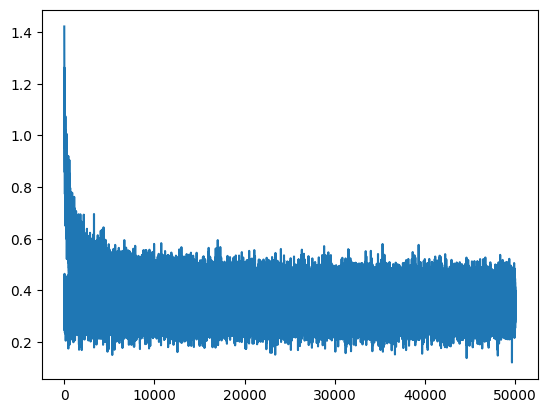

In [132]:
plt.plot(stepi,lossi)

In [133]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1+ b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits,Ydev)
loss.item()

2.2061996459960938

In [155]:
out = []
context = [0]*3

while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1,-1)) @ W1 + b1
    logits = h @ W2 + b2
    probs = F.softmax(logits,dim =1)
    ix = torch.multinomial(probs,num_samples=1,generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix ==0:
        break

print(''.join(itos[i] for i in out ))

      

aaharaanaanaalaanaalaianaa.
